# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve

# Importing the SHAP library
import shap as sh


# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

## **Data Preparation**

In [14]:
#Reading dataset for Logistic Regression
dataLR = pd.read_csv('non-null-data.csv')
dflr = dataLR.copy()
dflr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5960 non-null   int64  
 1   BAD                          5960 non-null   int64  
 2   LOAN                         5960 non-null   int64  
 3   MORTDUE                      5960 non-null   float64
 4   VALUE                        5960 non-null   float64
 5   REASON                       5960 non-null   object 
 6   JOB                          5960 non-null   object 
 7   YOJ                          5960 non-null   float64
 8   DEROG                        5960 non-null   float64
 9   DELINQ                       5960 non-null   float64
 10  CLAGE                        5960 non-null   float64
 11  NINQ                         5960 non-null   float64
 12  CLNO                         5960 non-null   float64
 13  DEBTINC           

In [15]:
# Dropping variables with high correlation
dflr.drop(columns=['MORTDUE','MORTDUE_missing_values_flag'],inplace=True)

### **Separating the target variable from other variables**

In [16]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
x = dflr.drop(columns=['BAD','Unnamed: 0',])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code

x = pd.get_dummies(x)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = dflr['BAD']
x

,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_missing_values_flag,...,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,False,...,False,True,0,1,0,0,1,0,0,0
1,1300,68400.0,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262,False,...,False,True,0,1,0,0,1,0,0,0
2,1500,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,False,...,False,True,0,1,0,0,1,0,0,0
3,1500,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,True,...,True,True,1,0,0,0,1,0,0,0
4,1700,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,False,...,False,True,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,41600,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,False,...,False,False,1,0,0,0,1,0,0,0
5956,41600,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,False,...,False,False,1,0,0,0,1,0,0,0
5957,41600,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,False,...,False,False,1,0,0,0,1,0,0,0
5958,41600,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,False,...,False,False,1,0,0,0,1,0,0,0


In [17]:
#Scaling the data is must for all regression models.
sc = StandardScaler()

x_scaled = sc.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    


NameError: name 'df' is not defined

### **Splitting the data into 70% train and 30% test set**

In [18]:
# Split the data into training and test set
# Remove _________ and complete the code
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 101,stratify=y)
y_train.value_counts(normalize=True)


0    0.800545
1    0.199455
Name: BAD, dtype: float64

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?

Splitting  Dataset on 20-80 and 30-70 ratio generated slightly differnt results.
20-80 ratio perform better result on Test data Recall value comparing to 30-70.
We can explain it ,as having more data on train data will generate better model. 

- If the data is imbalanced, can you make the split more balanced and if yes, how?

Imbalanced data can be splitted more balanced using different techniques as Cross- Validation, Ensembling techniques and etc.

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [19]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [20]:
# Defining the Logistic regression model
# Remove _________ and complete the code
lg = LogisticRegression(solver='newton-cg',class_weight='balanced')

# Fitting the model on the training data 
# Remove _________ and complete the code

lg.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', solver='newton-cg')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3817
           1       0.60      0.78      0.68       951

    accuracy                           0.85      4768
   macro avg       0.77      0.82      0.79      4768
weighted avg       0.87      0.85      0.86      4768



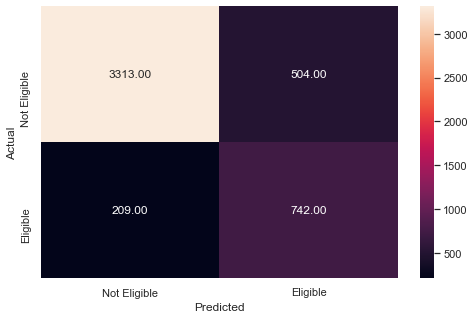

In [21]:
#Predict for train set
# Remove _________ and complete the code
y_pred_train = lg.predict(X_train)

#checking the performance on the train dataset
# Remove _________ and complete the code

metrics_score(y_train, y_pred_train)


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       954
           1       0.59      0.75      0.66       238

    accuracy                           0.84      1192
   macro avg       0.76      0.81      0.78      1192
weighted avg       0.86      0.84      0.85      1192



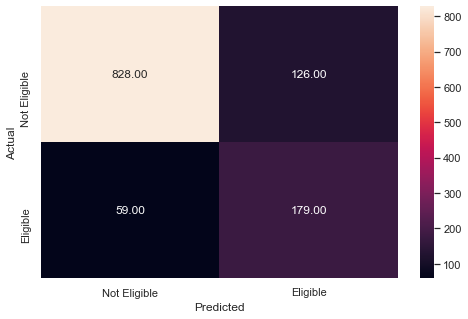

,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_missing_values_flag,...,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5801,2.545249,-0.640095,-0.801987,0.0,0.0,0.341069,-0.826792,-0.540260,-0.584226,-0.13839,...,-0.196696,-0.519593,0.652562,-0.652562,-0.384316,2.299330,-0.899944,-0.521936,-0.136489,-0.182938
3250,-0.070462,0.065110,-1.223251,0.0,0.0,-0.375720,-0.065054,-0.323913,0.073016,-0.13839,...,-0.196696,-0.519593,0.652562,-0.652562,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938
2820,-0.243401,0.300693,-1.082830,0.0,0.0,-0.446657,-0.065054,1.406866,-0.136217,-0.13839,...,-0.196696,-0.519593,0.652562,-0.652562,-0.384316,-0.434909,-0.899944,1.915945,-0.136489,-0.182938
3233,-0.081270,-0.075309,-0.521145,0.0,0.0,-1.123477,2.981897,0.974171,0.140949,-0.13839,...,-0.196696,1.924584,0.652562,-0.652562,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938
1887,-0.600089,0.054832,0.180961,0.0,0.0,0.058532,-0.065054,0.865997,-1.029888,-0.13839,...,-0.196696,-0.519593,0.652562,-0.652562,-0.384316,-0.434909,-0.899944,1.915945,-0.136489,-0.182938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,-0.578471,-1.004319,2.006436,0.0,0.0,-0.528283,-0.826792,0.108782,0.867706,-0.13839,...,-0.196696,-0.519593,-1.532421,1.532421,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938
3322,-0.038035,-1.283230,-1.082830,0.0,0.0,0.226603,-0.826792,-0.648434,0.630147,-0.13839,...,-0.196696,-0.519593,0.652562,-0.652562,-0.384316,2.299330,-0.899944,-0.521936,-0.136489,-0.182938
4164,0.394313,1.094166,1.866015,0.0,0.0,-0.314891,-0.826792,0.433303,0.883820,-0.13839,...,-0.196696,-0.519593,0.652562,-0.652562,-0.384316,-0.434909,-0.899944,1.915945,-0.136489,-0.182938
4660,0.696958,1.144794,-0.240303,0.0,0.0,-0.062534,-0.065054,-0.107566,-2.911193,-0.13839,...,5.083979,-0.519593,0.652562,-0.652562,-0.384316,-0.434909,1.111180,-0.521936,-0.136489,-0.182938


In [22]:
#Predict for test set
# Remove _________ and complete the code

y_pred_test=lg.predict(X_test)

#checking the performance on the test dataset
# Remove _________ and complete the code

metrics_score(y_test,y_pred_test)
X_test

**Observations: **

Train and test data are generating similar accuracy rate 0.84.

Logistic regression model is running well on identifying precision score with score 0.94, which is set of customers who will pay off loan. 

However, as our priority is minimizing false negative rate, we need to focus on maximizing RECAll score and minimize the risk of loosing investments. In our test data Recall score is 0.76.

We should work on maximizing Recall score.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [23]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code

cols = x.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC_missing_values_flag,1.175254
VALUE_missing_values_flag,0.667718
DEBTINC,0.512614
CLNO_missing_values_flag,0.343331
NINQ,0.264833
CLAGE_missing_values_flag,0.230306
JOB_Sales,0.154718
NINQ_missing_values_flag,0.124760
REASON_missing_values_flag,0.067840
JOB_Self,0.060934


**Observation*

Features which positively affect on the attrition rate are:

DEBTINC_missing_values_flag	
VALUE_missing_values_flag	
DEBTINC              
CLAGE_missing_values_flag	
NINQ	
LOAN	
VALUE	
JOB_Sales	
CLNO_missing_values_flag	                                
NINQ_missing_values_flag	              
JOB_Mgr	
JOB_Self	
REASON_HomeImp	
JOB_Other	
REASON_missing_values_flag

Features which negatively affect on the attrition rate are:
CLNO	
JOB_ProfExe	
REASON_DebtCon	
YOJ	
YOJ_missing_values_flag	
JOB_Office	
JOB_missing_values_flag	
CLAGE	
DELINQ_missing_values_flag


The coefficients of the logistic regression model give us the log of odds. We can convert the log of odds into odds by taking its exponential.



In [24]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
DEBTINC_missing_values_flag,3.238966
VALUE_missing_values_flag,1.949783
DEBTINC,1.669650
CLNO_missing_values_flag,1.409635
NINQ,1.303213
CLAGE_missing_values_flag,1.258985
JOB_Sales,1.167329
NINQ_missing_values_flag,1.132877
REASON_missing_values_flag,1.070194
JOB_Self,1.062829


Observations:

The odds of an Potential  customer with DEBTINC_missing_values_flag	 are 3.2 times the odds of one who has DEBTINC information provided,so once customers who dont have DEBTINC in their profile are most likely fail with payments.

The odds of customers not having Value of loan in dataset is 1.95 the odds of one who has it.

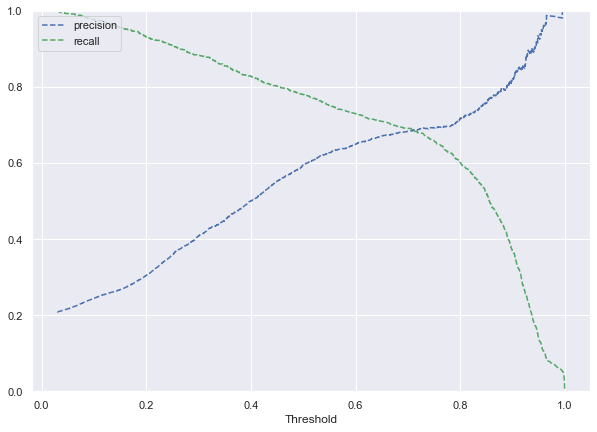

In [25]:
#Finding optimal threshold

y_scores_lg = lg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()



              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3817
           1       0.68      0.69      0.69       951

    accuracy                           0.87      4768
   macro avg       0.80      0.81      0.80      4768
weighted avg       0.88      0.87      0.88      4768



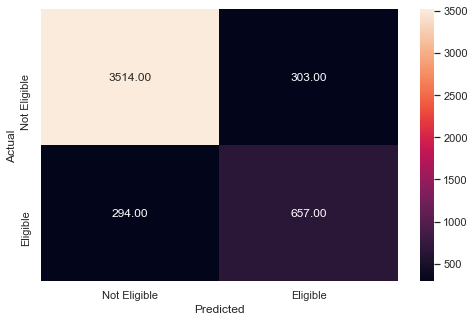

In [26]:
optimal_threshold1 = 0.7

y_pred_train = lg.predict_proba(X_train)

metrics_score (y_train, y_pred_train[:, 1] > optimal_threshold1)



**Insights **

Using optimal threshold led to improving in F1 score from 0.85 to 0.88 in test data. 

However, Recall score has significantly dropped from 0.78 to 0.69.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?

Yes, we can try to use optimal threshold value as we generated above.
- How to get an optimal threshold and which curve will help you achieve?

We should try to find crossing point of Recall and Precision score.
- How does, accuracy, precision and recall change on the threshold?

Optimal threshold score will maximize F1 score of the data, up to that our recall and precision score can variate.

Permutation explainer: 1193it [00:25, 30.39it/s]                          


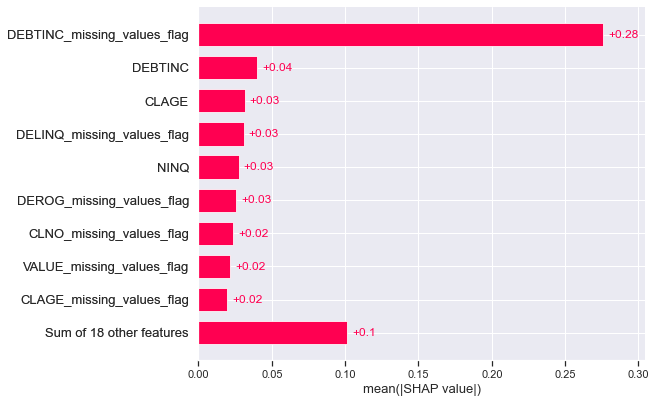

In [27]:
explainer = sh.Explainer(lg.predict, X_test)

# Calculating the SHAP values. The below code might take some time to run.
shap_values = explainer(X_test)
sh.plots.bar(shap_values)


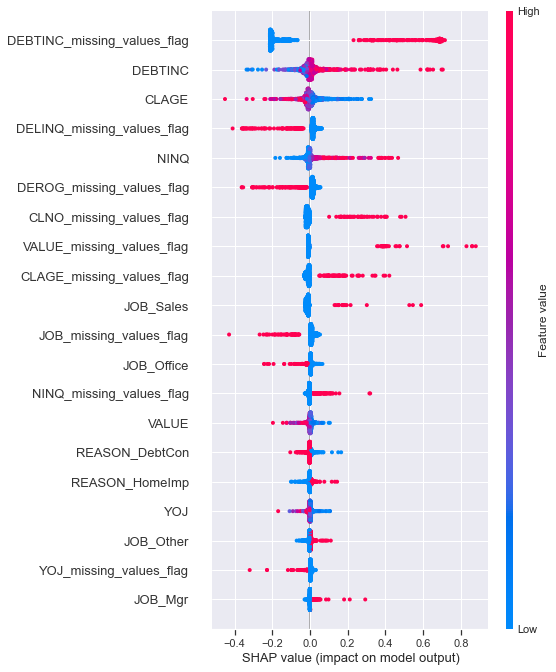

In [28]:
sh.summary_plot(shap_values)

Using 4768 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


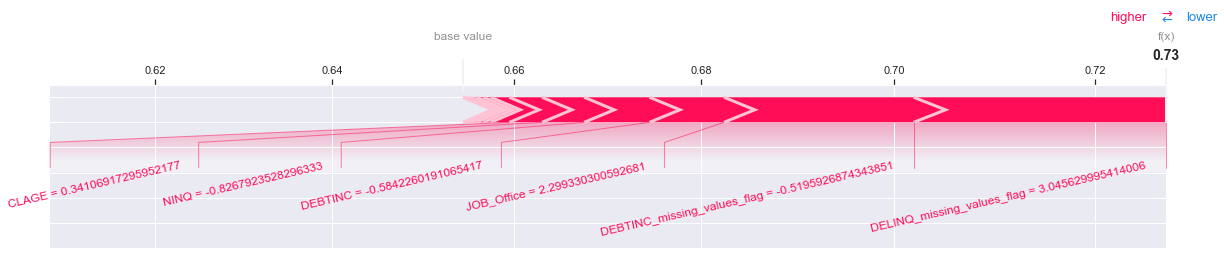

In [29]:
explainer = sh.KernelExplainer(lg.predict_proba, X_train)

shap_values1 = explainer.shap_values(X_test.iloc[0,:])

sh.force_plot(explainer.expected_value[0], shap_values1[0], X_test.iloc[0,:], matplotlib = True, text_rotation=13, link='logit')

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [30]:
# we use initial data for Tree methods.
data = pd.read_csv('hmeq.csv')
df= data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [31]:
cols = df.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    df[i] = df[i].astype('category')
df.dtypes

BAD        category
LOAN          int64
MORTDUE     float64
VALUE       float64
REASON     category
JOB        category
YOJ         float64
DEROG       float64
DELINQ      float64
CLAGE       float64
NINQ        float64
CLNO        float64
DEBTINC     float64
dtype: object

In [32]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    


#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(value=mode)


In [33]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df



In [34]:

# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    
    

In [35]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(value=mode)


#### Separating the target variable y and independent variable x

In [36]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code

X =df.drop(columns='BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = df['BAD']


#### Split the data

In [37]:
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify=y)

In [38]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

d_tree = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8},random_state=101)



In [39]:
#fitting Decision tree model
# Remove ___________ and complete the code
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=101)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



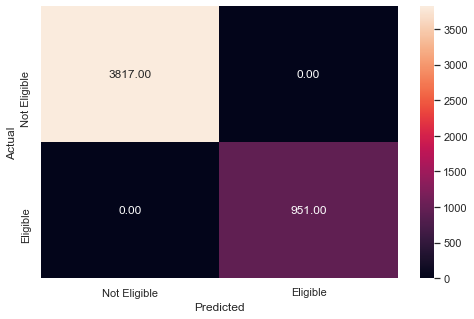

In [40]:
# Checking performance on the training data
# Remove ___________ and complete the code

y_pred_train=d_tree.predict(X_train)
metrics_score(y_train,y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       954
           1       0.70      0.60      0.64       238

    accuracy                           0.87      1192
   macro avg       0.80      0.77      0.78      1192
weighted avg       0.86      0.87      0.86      1192



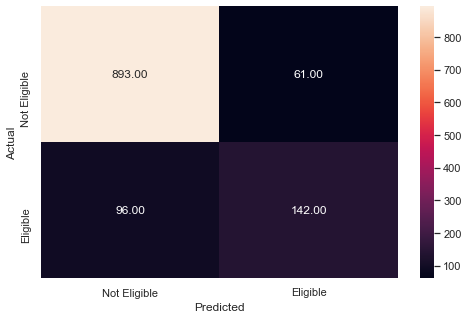

In [41]:
# Checking performance on the testing data
# Remove _________ and complete the code
y_pred_test=d_tree.predict(X_test)
metrics_score(y_test,y_pred_test)

**Insights **

Model is working very bad in test data, we can clearly see the signs of overfitting.
We can use hyperparameter tuning to remove overfitting.

### **Think about it:**
- Can we improve this model? 

We can use hyperparameter tuning to remove overfitting.
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [42]:
# Choose the type of classifier. 
# Remove _________ and complete the code
d_tree_tuned = DecisionTreeClassifier(random_state = 101, class_weight = {0: 0.2, 1: 0.8})


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [ 5 ,10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset
# Remove _________ and complete the code

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_leaf=25, random_state=101)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3817
           1       0.66      0.83      0.74       951

    accuracy                           0.88      4768
   macro avg       0.81      0.86      0.83      4768
weighted avg       0.90      0.88      0.89      4768



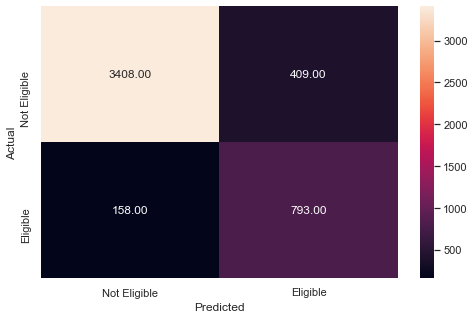

In [43]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_pred_train1 = d_tree_tuned.predict(X_train)
metrics_score(y_train,y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       954
           1       0.64      0.77      0.70       238

    accuracy                           0.87      1192
   macro avg       0.79      0.83      0.81      1192
weighted avg       0.88      0.87      0.87      1192



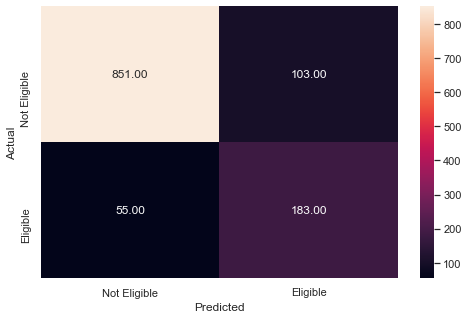

In [44]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

y_pred_test1 =d_tree_tuned.predict(X_test)
metrics_score(y_test,y_pred_test1)

**Insights **

Tuned Decision tree is predicting better Recall score 0.77. 
Model is working quite similar on train and test data, we can assume that our model isnt overfitting anymore.

#### Plotting the Decision Tree

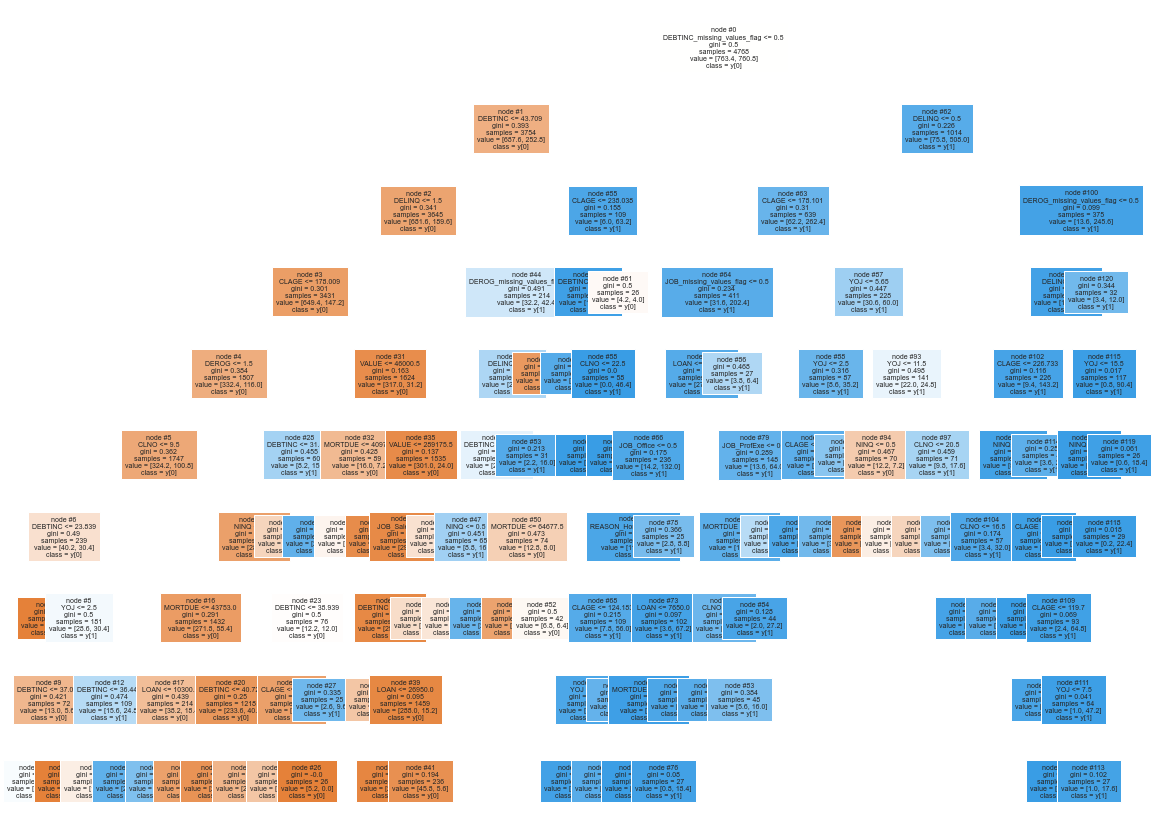

In [45]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code

features = list(X.columns)

plt.figure(figsize = (20, 15))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 7, node_ids = True, class_names = True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: 
Blue leaves  represents customers defaulted y[1], while orenge ones non-default customers y[0].

From our decision tree we can see that main indicator in approving loan is DEBTINC_missing_value_flag. on the second stage there are leaves of DELINQ and DEBTINC.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [46]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(random_state=101)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



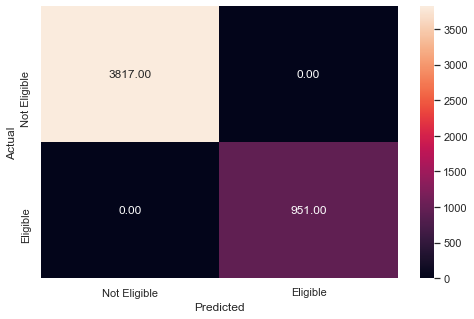

In [47]:
#Checking performance on the training data
# Remove _________ and complete the code
y_pred_train2 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train2)


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       954
           1       0.81      0.71      0.76       238

    accuracy                           0.91      1192
   macro avg       0.87      0.83      0.85      1192
weighted avg       0.91      0.91      0.91      1192



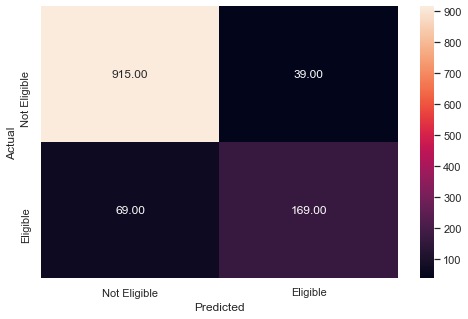

In [48]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test2 = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test2)

**Observations: __________**

### **Build a Random Forest model with Class Weights**

In [49]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rf_estimator1 = RandomForestClassifier(random_state = 101, class_weight = {0: 0.2, 1: 0.8})

# Fitting Random Forest model
# Remove _________ and complete the code

rf_estimator1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=101)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



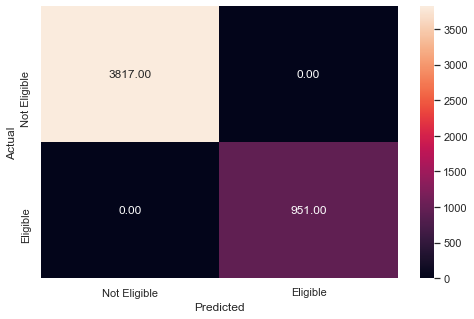

In [50]:
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train3 = rf_estimator1.predict(X_train)

metrics_score(y_train,y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       954
           1       0.83      0.70      0.76       238

    accuracy                           0.91      1192
   macro avg       0.88      0.83      0.85      1192
weighted avg       0.91      0.91      0.91      1192



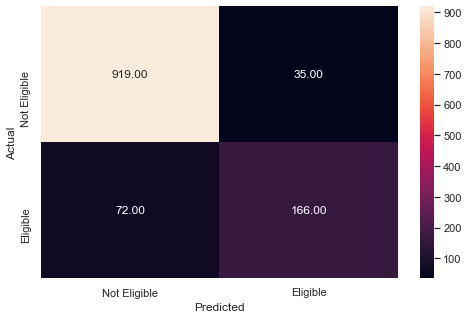

In [51]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test3 = rf_estimator1.predict(X_test)

metrics_score(y_test,y_pred_test3)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [52]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_estimator_tuned = RandomForestClassifier(random_state = 101, class_weight = {0: 0.2, 1: 0.8})
# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'n_estimators':np.arange(50,100,200),
              'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [ 5 ,10, 20, 25]

             }



# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)



# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_estimator_tuned.fit(X_train,y_train)



RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, min_samples_leaf=10, n_estimators=50,
                       random_state=101)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3817
           1       0.68      0.84      0.76       951

    accuracy                           0.89      4768
   macro avg       0.82      0.87      0.84      4768
weighted avg       0.90      0.89      0.90      4768



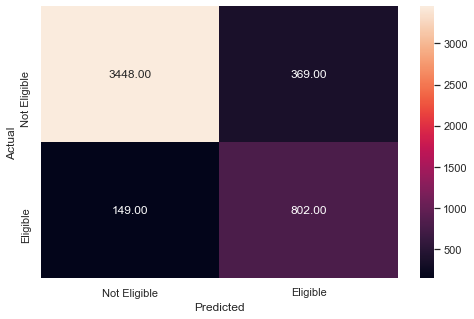

In [53]:
# Checking performance on the training data
# Remove _________ and complete the code
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train,y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       954
           1       0.63      0.74      0.68       238

    accuracy                           0.86      1192
   macro avg       0.78      0.82      0.80      1192
weighted avg       0.87      0.86      0.87      1192



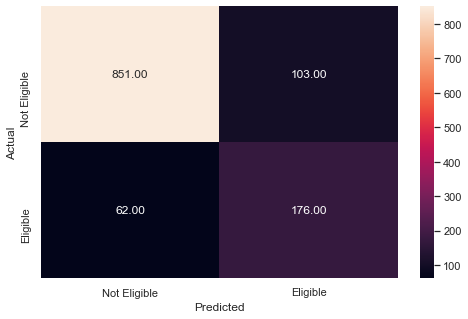

In [54]:
# Checking performace on test dataset
# Remove _________ and complete the code
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test,y_pred_test4)


**Insights: **

Tuned Random Forest is less overfitting than regular random forest, but our Recall score is quite low 0.75.

#### Plot the Feature importance of the tuned Random Forest

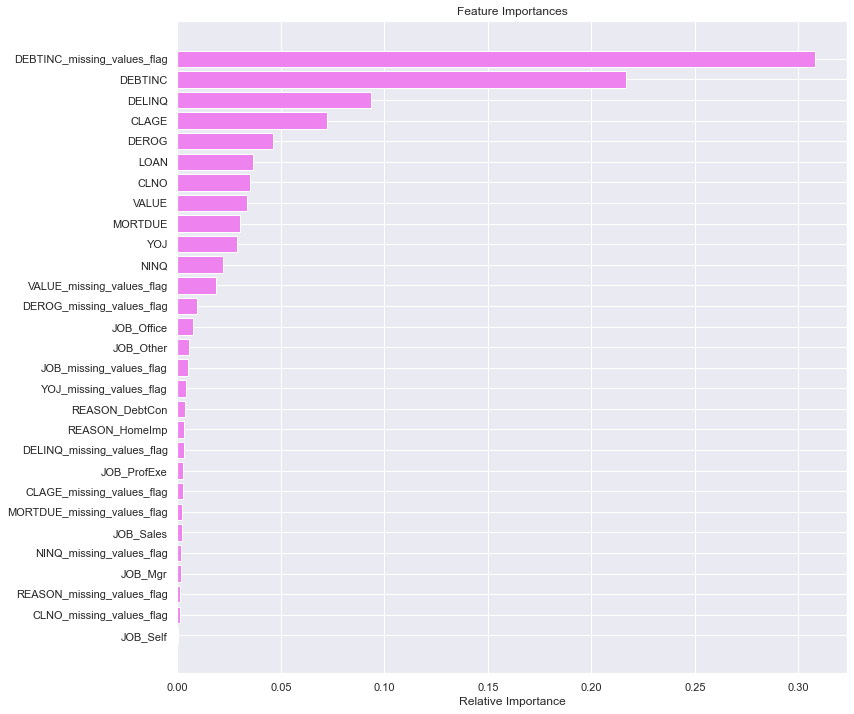

In [55]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

In [56]:
#other kind of boosting classifiers 

# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 101)

# Fitting the model
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=101)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3817
           1       0.87      0.74      0.80       951

    accuracy                           0.93      4768
   macro avg       0.90      0.85      0.88      4768
weighted avg       0.92      0.93      0.92      4768



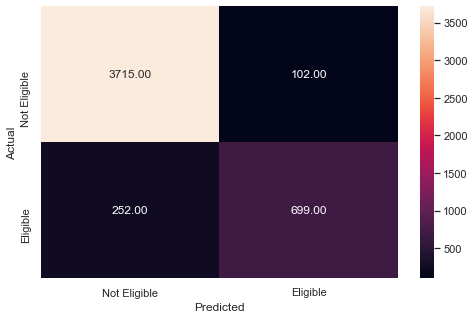

In [57]:
#Checking performance of train data
y_pred_train_gbc=gbc.predict(X_train)
metrics_score(y_train,y_pred_train_gbc)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       954
           1       0.83      0.64      0.72       238

    accuracy                           0.90      1192
   macro avg       0.87      0.80      0.83      1192
weighted avg       0.90      0.90      0.90      1192



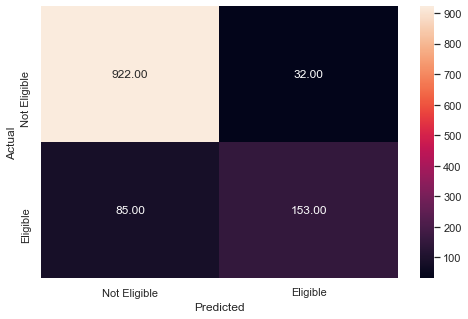

In [58]:
#Checking performance of test data
y_pred_test_gbc=gbc.predict(X_test)
metrics_score(y_test,y_pred_test_gbc)

In [59]:
#Tune Gradient Boosting Classifier
#setting up the range up parameters
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [60]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [61]:
#Printing the best estimators
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_leaf_nodes=50, n_estimators=300, subsample=0.5)
0.9213477022608206
{'subsample': 0.5, 'n_estimators': 300, 'max_leaf_nodes': 50, 'max_depth': 3}
6


In [62]:
#Fitting the data
GBclassifierTuned = GradientBoostingClassifier(subsample=1, n_estimators=400, max_depth=3, max_leaf_nodes=50)
GBclassifierTuned.fit(X_train, y_train)

GradientBoostingClassifier(max_leaf_nodes=50, n_estimators=400, subsample=1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3817
           1       0.95      0.87      0.91       951

    accuracy                           0.96      4768
   macro avg       0.96      0.93      0.94      4768
weighted avg       0.96      0.96      0.96      4768



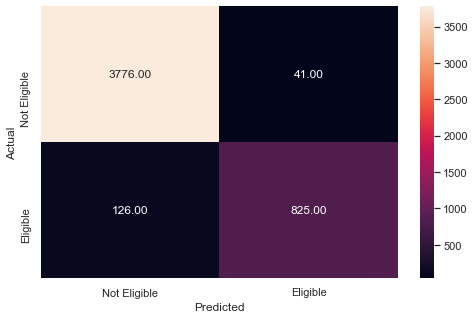

In [63]:
#Checking performance of train data
y_pred_train_gbcTune=GBclassifierTuned.predict(X_train)
metrics_score(y_train,y_pred_train_gbcTune)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.85      0.71      0.77       238

    accuracy                           0.92      1192
   macro avg       0.89      0.84      0.86      1192
weighted avg       0.91      0.92      0.91      1192



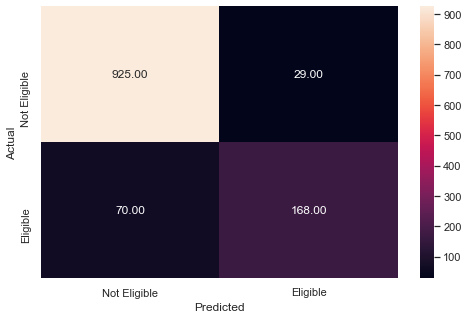

In [64]:
#Checking performance of test data
y_pred_test_gbcTune=GBclassifierTuned.predict(X_test)
metrics_score(y_test,y_pred_test_gbcTune)

Using 4768 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


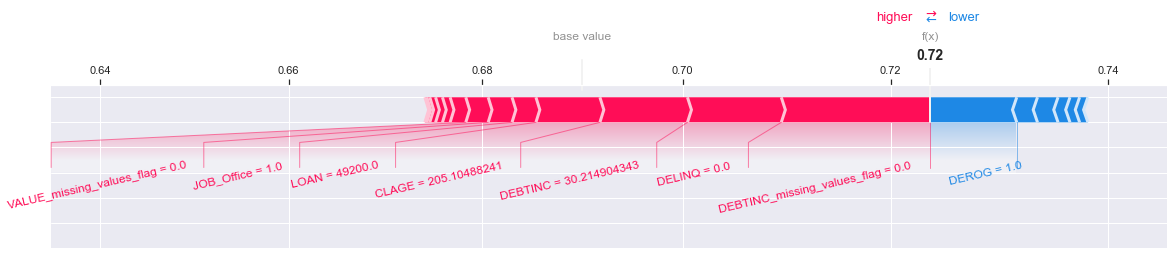

In [65]:
explainer = sh.KernelExplainer(GBclassifierTuned.predict_proba, X_train)

shap_values1 = explainer.shap_values(X_test.iloc[0,:])

sh.force_plot(explainer.expected_value[0], shap_values1[0], X_test.iloc[0,:], matplotlib = True, text_rotation=13, link='logit')



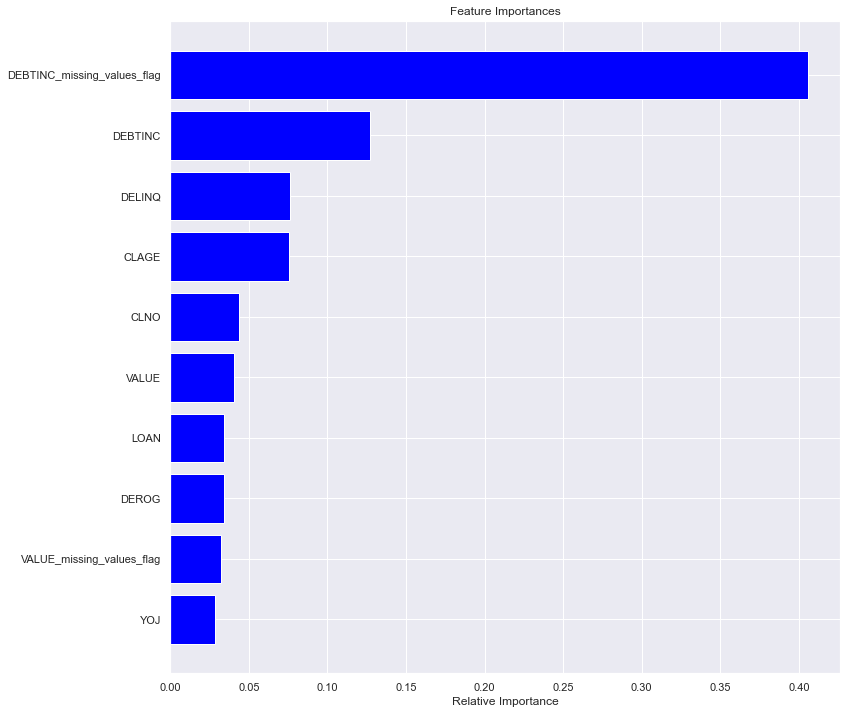

In [83]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = GBclassifierTuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(10), importances[indices[-10:]], color = 'Blue', align = 'center')

plt.yticks(range(10), [feature_names[i] for i in indices[-10:]])

plt.xlabel('Relative Importance')

plt.show()


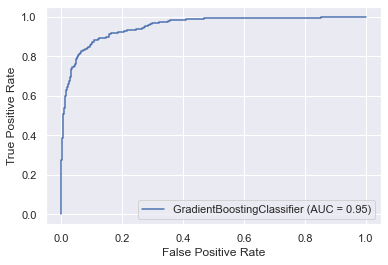

In [709]:

metrics.plot_roc_curve(GBclassifierTuned,X_test,y_test)

In [710]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 101, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=101, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      0.99      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



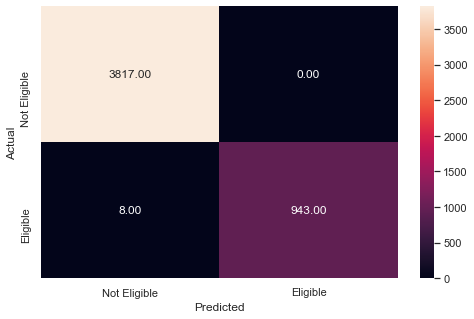

In [711]:
#Checking performance of train data
y_pred_train_xgb=xgb.predict(X_train)
metrics_score(y_train,y_pred_train_xgb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.87      0.73      0.79       238

    accuracy                           0.92      1192
   macro avg       0.90      0.85      0.87      1192
weighted avg       0.92      0.92      0.92      1192



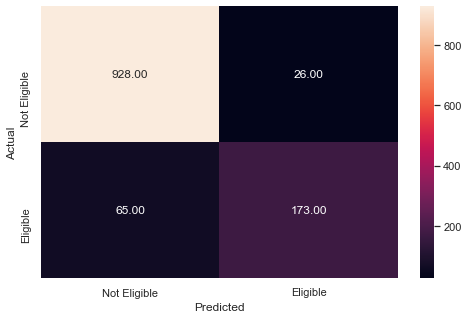

In [712]:
#Checking performance of test data
y_pred_test_xgb=xgb.predict(X_test)
metrics_score(y_test,y_pred_test_xgb)

In [713]:
#Lets optimize XGBclassifier
paramsXGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20]}


In [714]:
#Finding the best estimators
XGBc = RandomizedSearchCV(XGBClassifier(), paramsXGB, cv=20)
XGBc.fit(X_train, y_train)

[21:35:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:35:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:03] WARNING: /Users/runner/work/xgboost/xgboost/pytho

[21:36:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:36:45] WARNING: /Users/runner/work/xgboost/xgboost/pytho

[21:37:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:14] WARNING: /Users/runner/work/xgboost/xgboost/pytho

[21:37:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:40] WARNING: /Users/runner/work/xgboost/xgboost/pytho

[21:37:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:37:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[21:38:00] WARNING: /Users/runner/work/xgboost/xgboost/pytho

RandomizedSearchCV(cv=20,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_cat_to_onehot=None,
                            

In [715]:
#print the best estimators
print(XGBc.best_estimator_)
print(XGBc.best_score_)
print(XGBc.best_params_)
print(XGBc.best_index_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaf_nodes=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)
0.9310027776801096
{'subsample': 1, 'n_estimators': 500, 'max_leaf_nodes': 2, 'max_depth': 4}
2


In [716]:
#Fitting the data
XGBclassifierTuned = XGBClassifier(subsample=1, n_estimators=100, max_depth=5, max_leaf_nodes=5)
XGBclassifierTuned.fit(X_train, y_train)

[21:38:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaf_nodes=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3817
           1       0.99      0.96      0.98       951

    accuracy                           0.99      4768
   macro avg       0.99      0.98      0.99      4768
weighted avg       0.99      0.99      0.99      4768



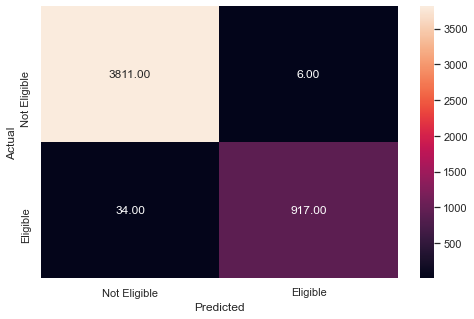

In [717]:
#Checking performance of train data
y_pred_train_xgbTuned=XGBclassifierTuned.predict(X_train)
metrics_score(y_train,y_pred_train_xgbTuned)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       954
           1       0.85      0.71      0.77       238

    accuracy                           0.92      1192
   macro avg       0.89      0.84      0.86      1192
weighted avg       0.91      0.92      0.91      1192



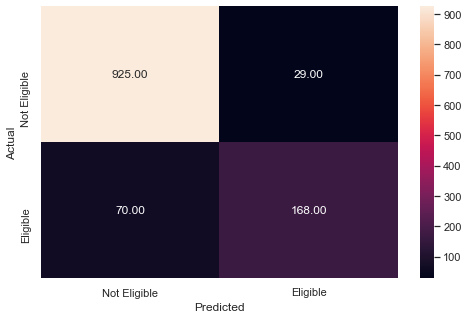

In [718]:
#Checking performance of train data
y_pred_test_xgbTuned=XGBclassifierTuned.predict(X_test)
metrics_score(y_test,y_pred_test_gbcTune)  

### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [d_tree,d_tree_tuned,rf_estimator,rf_estimator1,rf_estimator_tuned,gbc,xgb,GBclassifierTuned,XGBclassifierTuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    

In [ ]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Random Forest with Class Weight','Random Forest Tuned','GradientBoostingClassifier'
,'XGBClassifier','GBclassifierTuned','XGBclassifierTuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

**Insights: **


Almost all the models beside d_tree generated Test_Recall between 0.7 and 0.77.



**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

In [719]:
df = pd.DataFrame.from_records([{         'Model':'Linear Regression', 
                                          'Train_Accuracy': '0.85',
                                          'Test_Accuracy': '0.84',
                                          'Train_Recall': '0.78',
                                          'Test_Recall': '0.75',
                                          'Train_Precision': '0.60',
                                          'Test_Precision': '0.59'}], index=[9])

In [720]:
pd.concat([ comparison_frame,df],axis=0)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.0,0.868289,1.0,0.596639,1.0,0.699507
1,Tuned Decision Tree,0.881082,0.86745,0.833859,0.768908,0.659734,0.63986
2,Random Forest,1.0,0.909396,1.0,0.710084,1.0,0.8125
3,Random Forest with Class Weight,1.0,0.910235,1.0,0.697479,1.0,0.825871
4,Random Forest Tuned,0.891359,0.861577,0.843323,0.739496,0.684885,0.630824
5,GradientBoostingClassifier,0.925755,0.901846,0.735016,0.642857,0.872659,0.827027
6,XGBClassifier,0.998322,0.923658,0.991588,0.726891,1.0,0.869347
7,GBclassifierTuned,0.964975,0.916946,0.867508,0.705882,0.952656,0.852792
8,XGBclassifierTuned,0.991611,0.917785,0.964248,0.710084,0.993499,0.853535
9,Linear Regression,0.85,0.84,0.78,0.75,0.60,0.59
